Part 1: Import Tensorflow

In [1]:
import tensorflow as tf
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.8.2


Part 2: Import MNIST Dataset from Tensorflow and Show the pictures


11501568/11490434 [==============================] - 0s 0us/step
X_train_shape:  (60000, 28, 28)
Y_train_shape:  (60000,)
X_test_shape:  (10000, 28, 28)
Y_test_shape:  (10000,)


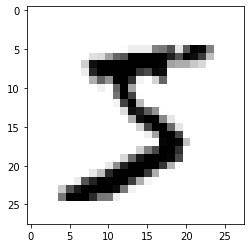

5
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [2]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
(trainX, trainY), (testX, testY) = mnist.load_data()
print('X_train_shape: ', trainX.shape)
#Activity 4: Implement the rest of print statements here
#Including trainY, testX, and testY
print('Y_train_shape: ', trainY.shape)
print('X_test_shape: ', testX.shape)
print('Y_test_shape: ', testY.shape)



#Show the first image of the training dataset
plt.imshow(trainX[0], cmap='binary')
plt.show()

#Show the labels (Y data) for each image
print(trainY[0])
#Show the range of labels
print(set(trainY))

Part 3: One-hot Encoding on Labels


In [3]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(trainY)
y_test_encoded = to_categorical(testY)

# Activity 5: Print encoded shape for both trainY and testY

#Own added below 
print('Y train encodedshape: ', y_train_encoded.shape)

print('Y test encodedshape: ', y_test_encoded.shape)

#Own added above


#display one of the encoded label
print(y_train_encoded[0])

Y train encodedshape:  (60000, 10)
Y test encodedshape:  (10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Part 4: Pre-processing the Examples

A: Reshape x values

X_train_shape:  (60000, 28, 28)
Y_train_shape:  (60000,)
testX_shape:  (10000, 28, 28)
testY_shape:  (10000,)


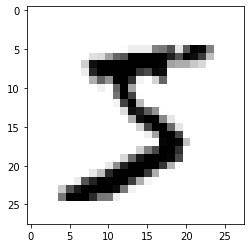

5
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
x_train_reshape_size:  (60000, 784)
x_test_reshape_size:  (10000, 784)


In [5]:
import numpy as np

#Acitity 6
#Use np.reshape() function to reshape both the training set and the test set of x values
print('X_train_shape: ', trainX.shape)
print('Y_train_shape: ', trainY.shape)
print('testX_shape: ', testX.shape)
print('testY_shape: ', testY.shape)

plt.imshow(trainX[0], cmap='binary')
plt.show()


print(trainY[0])
print(set(trainY))

#Own below: activity 6 is these 2 lines . we are flattening them so 1 dimension
x_train_reshape = np.reshape(trainX, (60000, 784))
x_test_reshape = np.reshape(testX, (10000, 784))
#Own above: 

# Uncomment below if you finished the reshape .Then you print to look at it
print("x_train_reshape_size: ", x_train_reshape.shape)
print("x_test_reshape_size: ", x_test_reshape.shape)

B: Normalize the pixel values

In [15]:
# Print one of the data to see how the pixel values range
print(set(x_train_reshape[0]))


x_mean = np.mean(x_train_reshape)
x_std = np.std(x_train_reshape)

epsilon = 1e-10
x_train_norm = (x_train_reshape - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshape - x_mean) / (x_std + epsilon)

print(x_train_norm[0])
print(x_test_norm[0])

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}
[-0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.4

Part 5: Create the Model

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#Below two Dense lines are for hidden layer
model = Sequential([
  Dense(128, activation='relu', input_shape =(784,)),
  Dense(128, activation='relu'),
  
  #Activity 8
  #Write the output layer below, be sure to use softmax as the activation function

  #Own there is 1 layer for the outer layer and don't need to specify input_shape is 784 cuz output from hidden layer is input for outer layer. 
  #Also, don't need to type model = Sequential ([ again since we already built model for hidden layer previously
  Dense(10, activation='softmax')
  #Dense(10, activation='softmax', input_shape =(784,)),
  #Dense(10, activation='softmax'),

  
])

Part 6: Compile the Model

In [12]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(x_train_norm, y_train_encoded, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2142 - accuracy: 0.9348
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1015 - accuracy: 0.9680
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0724 - accuracy: 0.9763


Part 7: Save the Model

In [17]:
# saving the model
model.save("numRecognition.model")

INFO:tensorflow:Assets written to: numRecognition.model/assets


INFO:tensorflow:Assets written to: numRecognition.model/assets


In [19]:
# load model
myModel = tf.keras.models.load_model('numRecognition.model')

Part 8: Preprocessing your own images

In [21]:
# importing libaries
import cv2
import matplotlib.pyplot as plt

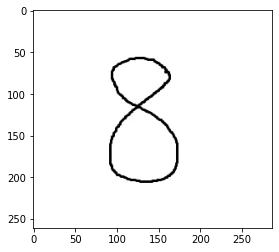

In [22]:
# Activity 10: load my own image
imageOrginal = cv2.imread('8_image.jpg', cv2.IMREAD_GRAYSCALE) # read image: FILL THIS IN

# preview image
plt.imshow(imageOrginal, cmap = 'gray') # show image without pesudocolor

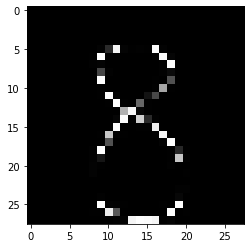

In [23]:
# Activity 11: format image
imageResized = cv2.resize(imageOrginal, (40, 40), interpolation = cv2.INTER_LINEAR) # resize image to 28-by-28, fill in the dashes
imageInvert = cv2.bitwise_not(imageResized) # invert the colors, fill in the dashes
imagePadded = cv2.copyMakeBorder(imageInvert, 4, 4, 4, 4, borderType = cv2.BORDER_CONSTANT) # fill in the dashes
imageCropped = imagePadded[8:36, 8:36] # cropping the image
finalImage = imageCropped

# preview image
plt.imshow(finalImage, cmap = 'gray') # shows image without pesudocolor

In [24]:
# making predictions
predictions = myModel.predict(finalImage.reshape(1, 784), batch_size = 1) # note predict() takes a list
print("Prediction made")

Prediction made


In [25]:
# reading the predictions (orginally in form of probability distribution)
print(np.argmax(predictions)) # print the prediction

3
